In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

import sklearn

In [2]:
df = pd.read_excel('news_label.xlsx', engine='openpyxl')

In [3]:
df = df.rename(columns={'dates':'date', 'titles':'title','contents':'content'})
df['content'] = df['title'] + df['content']
df = df.drop(columns=['근거', 'title'])
df['label'] = df['label'].astype(int)
df

,date,content,label
0,2021.10.05,[[톡톡 이상품] 한빛코리아 / 다지워 네이처 클렌징 솝]//[\n마스카라까지 지우...,1
1,2021.10.07,"[[격동의 유통가④]편의점 성장 정체…미래는 근거리 쇼핑]//[""파괴적 커머스 시대...",1
2,2021.10.08,[株머니 매니저의 HOT종목]//[\n\n\n\n\n 씨에스윈드는 풍력발전기를 구성...,1
3,2021.10.11,"[김민수 더맘마 대표 ""동네마트와 '상생'이 경쟁력…30분 총알배송 목표""]//[\...",1
4,2021.10.13,"[""카카오 보고있나""…진격의 네이버페이, 中 최대 직구몰 손잡았다]//[[주간투자동...",1
...,...,...,...
274,2022.09.23,"[WCP 흥행 실패에 컬리, 케이뱅크 상장 시기 '안갯속']//[\n심사 승인 났는...",0
275,2022.09.26,"[[먹거리+IT] 네이처랩 오경주 대표, “맛있고 건강한 주스 추천 서비스를 개발합...",1
276,2022.09.27,"[""투자 늘렸는데 이제와서…"" 퀵커머스마저 규제하나 '초긴장']//[\n■국감 오르...",0
277,2022.09.29,[국내 이커머스 상장 1호 주인공 누가될까 [격변의 이커머스①]]//[\n이커머스 ...,0


In [4]:
df_shuffle = sklearn.utils.shuffle(df)
df_shuffle.head()

,date,content,label
143,2022.03.29,[800리터 양문형 냉장고도 '내일' 배송…G마켓의 '새벽'은 다를까]//[누가 더...,1
149,2022.04.06,[딱 하나만 파는 ‘버티컬커머스’ 전문성 무기로 소비자 마음 잡았다]//[코로나 특...,1
159,2022.04.19,[새 개편안 첫 타자는…컬리? CJ올리브영?]//[대기업도 백기든 새벽배송…'마켓컬...,0
15,2021.10.28,"[새벽배송 업계, 상장 레이스 뛰어들었다…SSG닷컴·마켓컬리·오아시스 채비]//[S...",1
267,2022.09.13,[급성장한 '컬리' 고수익의 '오아시스'…동시 상장하면 누가 흥행할까]//[오아시스...,1


In [5]:
train_ratio = 0.8
train_range = int(len(df_shuffle) * train_ratio)
train_range

223

In [6]:
train_data = df_shuffle[:train_range]
test_data = df_shuffle[train_range:]

In [7]:
print(len(train_data), len(test_data))

223 56


<AxesSubplot:>

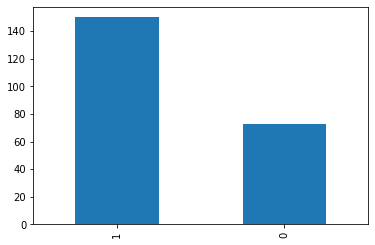

In [8]:
train_data['label'].value_counts().plot(kind = 'bar')

In [9]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0     73
1      1    150


In [10]:
# print(train_data.isnull().sum())
print(test_data.isnull().sum())

date       0
content    0
label      0
dtype: int64


## 토크나이저를 이용한 정수 인코딩

In [37]:
# !pip install transformers==4.12.5

     ---------------------------------------- 3.1/3.1 MB 39.2 MB/s eta 0:00:00
  Using cached tokenizers-0.10.3-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached sacremoses-0.0.53.tar.gz (880 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=f754f4156136945f18435c7a54de0495bfba880fae5d714a77bc3015b3f529bf
  Stored in directory: c:\users\hslio\appdata\local\pip\cache\wheels\12\1c\3d\46cf06718d63a32ff798a89594b61e7f345ab6b36d909ce033
Successfully built sacremoses
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.12.1
    Uninstalling tokenizers-0.12.1:
      Successfully uninstalled tokenizers-0.12.1


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\hslio\\miniforge3\\envs\\lhs\\Lib\\site-packages\\~okenizers\\tokenizers.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
import transformers 

In [39]:
transformers.__version__

'4.22.2'

In [14]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base")

In [15]:
test_data = test_data.dropna(how = 'any')

In [16]:
print(len(test_data))

56


In [17]:
X_train_list = train_data['content'].tolist()
X_test_list = test_data['content'].tolist()
y_train = train_data['label'].tolist()
y_test = test_data['label'].tolist()

In [18]:
# X_train_list 
X_test_list
# y_train
# y_test

['[[트렌D] “소풍도 가고 선물도 받고”…막오른 가정의달 기획전 ‘풍성’]//[\n국내외 커머스 분야에선 새로운 흐름에 맞춰 변화가 지속되고 있습니다. 그만큼 흥미로운 현상도 생기고 논란이 발생하기도 하죠. 디지털데일리는 이곳에서 일어나는 재밌는 이야기들을 찾아 전달하고자 합니다. ‘트렌디’한 소비자가 되는 길, 시작해볼까요?<편집자 주>\n\n\n\n    [디지털데일리 이안나 기자] 온오프라인 유통업계가 가정의달 5월을 맞아 들썩이는 모습입니다. 각종 기념일이 몰려 있어 선물 수요가 높아지는 시기인 데다 갑자기 더워진 날씨에 맞춰 자연으로 떠나는 차박·캠핑족도 늘고 있거든요. 거리두기 해제로 수요가 높아진 패션·뷰티 카테고리 외에도 각양각색 상품을 판매할 수 있는 절호의 기회입니다.    이커머스 업계 기획전도 규모가 커졌습니다. 어버이날·스승의날은 물론 로즈데이와 성년의날까지 몰려있기 때문이겠죠. “뭘 좋아할지 몰라 다 준비했어”라는 말이 떠오를 정도로 전 고객에 맞춘 인기 선물 상품과 나들이에 필요한 제품을 모은 기획전까지 풍성합니다.    마켓컬리는 오는 12일까지 일주일간 ‘성년의날(16일)·로즈데이(14알) 선물 특가전’을 진행합니다. 기념일 선물로 좋은 향수·뷰티용품·꽃다발·감사카드 등 220여가지 상품을 최대 53% 할인해 판매합니다. 향수는 높은 판매량을 기록한 인기 상품을 엄선했다는데요. 성년의날 대표 선물로 꼽히는 만큼 수요가 많을 듯합니다. \n\n\n\n  동시에 컬리는 16일까지 고마운 사람들에게 마음을 전하는 ‘디어 마이 페스티벌’ 기획전도 진행 중입니다. 어린이용 완구제품부터 어버이날, 스승의날을 위한 건강기능식품 등 1000여종 상품을 할인 판매하는데요. 부모님께 선물하기 좋은 제품만 350여종을 준비해 이번 주말 미리 준비 못한 사람들도 이용할 수 있겠습니다.   새벽배송 서비스가 보편화되면서 꽃 배송도 가능해진 게 눈에 띕니다. 최근 국내 화훼시장은 장기화된 코로나19로 2년 넘게 꽃 소비가 줄어 어려운 상황입니다. 이전

In [19]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [20]:
X_train

{'input_ids': [[2, 63, 6971, 2059, 2115, 1402, 2346, 2444, 8545, 2119, 11, 5420, 11, 9488, 121, 43, 13319, 2079, 11, 5566, 11, 1497, 25444, 64, 19, 19, 63, 4869, 831, 5765, 15519, 121, 5566, 2393, 2224, 3952, 2251, 3855, 64, 19, 19, 63, 24, 2446, 11461, 22, 2446, 121, 7931, 3019, 2059, 16297, 11, 9534, 4496, 11, 18271, 2299, 64, 19, 19, 63, 6, 1872, 2163, 11257, 100, 1, 100, 22, 2232, 13717, 4642, 2299, 2118, 121, 21859, 2024, 5126, 18327, 9846, 5889, 6, 64, 19, 19, 63, 6, 1714, 2059, 4939, 6, 5566, 2393, 2224, 23, 451, 16, 19436, 26296, 7099, 2062, 64, 19, 19, 63, 21859, 2024, 5126, 16, 24652, 13319, 3877, 2145, 18327, 7450, 17, 13893, 64, 19, 19, 63, 13893, 7072, 116, 21859, 2024, 5126, 16, 24652, 13319, 3877, 6233, 11359, 2225, 7594, 117, 64, 19, 19, 63, 4325, 2182, 2589, 5267, 5267, 2440, 22, 2446, 5566, 2393, 2224, 3648, 16, 4172, 2614, 3710, 2446, 2252, 2299, 2118, 3877, 121, 4743, 2086, 2664, 3797, 5269, 2299, 2118, 11, 3855, 2284, 11, 5566, 2393, 2224, 23868, 2223, 2155, 43, 13

In [21]:
print(X_train[0].tokens)

['[CLS]', '[', '800', '##리', '##터', '양', '##문', '##형', '냉장고', '##도', "'", '내일', "'", '배송', '…', 'G', '##마켓', '##의', "'", '새벽', "'", '은', '다를까', ']', '/', '/', '[', '누가', '더', '멀리', '가나', '…', '새벽', '##배', '##송', '전국', '##구', '경쟁', ']', '/', '/', '[', '4', '##조', 'vs', '2', '##조', '…', '마켓', '##컬', '##리', '몸값', "'", '거품', '논란', "'", '넘어설', '##까', ']', '/', '/', '[', '"', '풀', '##필', '##먼트', '·', '[UNK]', '·', '2', '##차', '##전지', '소재', '##까', '##지', '…', '지어', '##소', '##프트', '신사업', '출동', '대기', '"', ']', '/', '/', '[', '"', '컬', '##리', '출발', '"', '새벽', '##배', '##송', '3', '社', ',', 'IPO', '포문', '열렸', '##다', ']', '/', '/', '[', '지어', '##소', '##프트', ',', '오아시스', '##마켓', '성장', '##과', '신사업', '기대감', '-', '교보', ']', '/', '/', '[', '교보', '##증권', '“', '지어', '##소', '##프트', ',', '오아시스', '##마켓', '성장', '##으로', '기업가', '##치', '증대', '”', ']', '/', '/', '[', '핵심', '##요', '##약', '##20', '##20', '##년', '2', '##조', '새벽', '##배', '##송', '시장', ',', '내년', '##엔', '12', '##조', '##원', '##까', '##지', '성장', '…', '유통',

In [22]:
print(X_train[0].ids)

[2, 63, 6971, 2059, 2115, 1402, 2346, 2444, 8545, 2119, 11, 5420, 11, 9488, 121, 43, 13319, 2079, 11, 5566, 11, 1497, 25444, 64, 19, 19, 63, 4869, 831, 5765, 15519, 121, 5566, 2393, 2224, 3952, 2251, 3855, 64, 19, 19, 63, 24, 2446, 11461, 22, 2446, 121, 7931, 3019, 2059, 16297, 11, 9534, 4496, 11, 18271, 2299, 64, 19, 19, 63, 6, 1872, 2163, 11257, 100, 1, 100, 22, 2232, 13717, 4642, 2299, 2118, 121, 21859, 2024, 5126, 18327, 9846, 5889, 6, 64, 19, 19, 63, 6, 1714, 2059, 4939, 6, 5566, 2393, 2224, 23, 451, 16, 19436, 26296, 7099, 2062, 64, 19, 19, 63, 21859, 2024, 5126, 16, 24652, 13319, 3877, 2145, 18327, 7450, 17, 13893, 64, 19, 19, 63, 13893, 7072, 116, 21859, 2024, 5126, 16, 24652, 13319, 3877, 6233, 11359, 2225, 7594, 117, 64, 19, 19, 63, 4325, 2182, 2589, 5267, 5267, 2440, 22, 2446, 5566, 2393, 2224, 3648, 16, 4172, 2614, 3710, 2446, 2252, 2299, 2118, 3877, 121, 4743, 2086, 2664, 3797, 5269, 2299, 2118, 11, 3855, 2284, 11, 5566, 2393, 2224, 23868, 2223, 2155, 43, 13319, 121, 6, 38

In [23]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

type_ids는 지금 풀고자 하는 문제에서 문장의 종류의 개수를 의미하는데, <br/>일반적으로 두 개 이상의 문장을 가지고 푸는 문제일 경우에는 [0, 0, 0, 0, 1, 1, 1, 1] 이런 식의 값이 들어가지만 네이버 영화 리뷰는 문장 1개를 보고 푸는 문제라서 [0, 0, 0, 0, 0, 0, 0, 0]이 들어간다.

In [24]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

## 데이터셋 생성 및 모델 학습

In [25]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [26]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [28]:
model = TFBertForSequenceClassification.from_pretrained("klue/bert-base", num_labels=2, from_pt=True)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
model.compute_loss

<bound method TFPreTrainedModel.compute_loss of <transformers.models.bert.modeling_tf_bert.TFBertForSequenceClassification object at 0x00000182D9463D60>>

In [31]:
train_dataset

<TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [32]:
val_dataset

<TensorSliceDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(512,), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.int32, name=None)}, TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [36]:
callback_earlystop = EarlyStopping(
    monitor="val_accuracy", 
    min_delta=0.001,
    patience=2)

model.fit(
    train_dataset.shuffle(10000).batch(32), epochs=2, batch_size=30,
    validation_data = val_dataset.shuffle(10000).batch(30),
    callbacks = [callback_earlystop]
)

Epoch 1/2


AttributeError: in user code:

    File "C:\Users\hslio\miniforge3\envs\lhs\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\hslio\miniforge3\envs\lhs\lib\site-packages\transformers\modeling_tf_utils.py", line 1319, in compute_loss  *
        return super().compute_loss(*args, **kwargs)
    File "C:\Users\hslio\miniforge3\envs\lhs\lib\site-packages\keras\engine\training.py", line 948, in compute_loss  **
        return self.compiled_loss(
    File "C:\Users\hslio\miniforge3\envs\lhs\lib\site-packages\keras\engine\compile_utils.py", line 199, in __call__
        y_t, y_p, sw = match_dtype_and_rank(y_t, y_p, sw)
    File "C:\Users\hslio\miniforge3\envs\lhs\lib\site-packages\keras\engine\compile_utils.py", line 726, in match_dtype_and_rank
        if ((y_t.dtype.is_floating and y_p.dtype.is_floating) or

    AttributeError: 'NoneType' object has no attribute 'dtype'


In [ ]:
model.evaluate(val_dataset.batch(1024))